<a href="https://colab.research.google.com/github/Kozhedu/MOMO_2/blob/main/Kaggle_reg_KozhedubNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключение к Kaggle для загрузки данных прямо из браузера


 Проходим в [Свой профиль на Kaggle](https://www.kaggle.com/me/account) и жмем "Create API Token".
 
 Это вызовет загрузку файла *kaggle.json*, содержащего ваши учетные данные для API.

Затем запустите ячейку ниже, чтобы загрузить kaggle.json в среду выполнения Colab.

In [ ]:
from google.colab import files # чтобы загружать файлы в облако через проводник 

In [ ]:
uploaded = files.upload() #просто запускаем и выбираем файл  API токена в проводнике

#↓ строка которая активирует наш API токен
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


# Загружаем Данные

Можно загружать "скучно" скачав данные [Со странницы соревнования](https://www.kaggle.com/competitions/urfuaieng2022reg2/data)

Либо через Kaggle api по указанной ссылке 

In [ ]:
#↓ добавился восклицательный знак, потому что это колаб
!kaggle competitions download -c urfuaieng2022reg2

 64% 27.0M/42.1M [00:00<00:00, 95.6MB/s]
100% 42.1M/42.1M [00:00<00:00, 109MB/s] 


Распаковываем архив "на месте" 

In [ ]:
#↓ "распакуй" + имя архива
!unzip urfuaieng2022reg2.zip

Archive:  urfuaieng2022reg2.zip
  inflating: Submission_reg.csv      
  inflating: Test_Who.csv            
  inflating: Train_Target_reg.csv    
  inflating: Train_Who.csv           
  inflating: assessments.csv         
  inflating: courses.csv             
  inflating: studentAssessment.csv   
  inflating: studentInfo.csv         
  inflating: studentRegistration.csv  
  inflating: studentVle.csv          
  inflating: vle.csv                 


## Некоторые полезные функции для анализа табличек между собой

In [ ]:
def compareCols(df1, df2):
    '''
    Проверьте, какие столбцы являются общими для двух фреймов данных, 
    и подсчитайте значения df1, присутствующие и отсутствующие в df2 (в общих столбцах).
    '''

    # Показать общие столбцы между фреймами данных
    # (a) Составьте списки столбцов для каждого фрейма данных
    df1Columns = df1.columns.values.tolist()
    df2Columns = df2.columns.values.tolist()

    # (b) Найдите одинаковые имена столбцов
    diffDict = set(df1Columns) & set(df2Columns)
    
    print('Общие колонки : ', diffDict, '\n')

    # (c) Составьте список из словаря
    diffList = list(diffDict)
    # (d) Убедитесь, что если значения в
    # каждый общий столбец совпадает в
    # двух фреймах данных
    for col in diffList:
        x = df1[col].isin(df2[col]).value_counts()
        print('Проверяем, присутствуют ли значения в обоих фреймах данных:')
        print(x, '\n')



In [ ]:
def findDiffValues(df1, df2, col):
    '''
    Найти все значения df1.col, отсутствующие в df2.col
    '''
    # Вытащите все уникальные значения col
    df1_IDs = df1[col].unique()
    df2_IDs = df2[col].unique()

    # Сравните два списка
    # (a) Найдите, какие значения отличаются
    diff = set(df1_IDs).difference(set(df2_IDs))
    # (b) осчитайте, сколько разных
    numberDiff = len(diff)

    print("Значения из df1 не в df2: " + str(diff))
    print("Количество пропущенных значений: " + str(numberDiff))

In [ ]:
def printDiffValues(df1, df2, col):
    '''
    Показать все значения df1.col, отсутствующие в df2.col
    '''
    # Вытащить все уникальные значения col
    df1_IDs = df1[col].unique()
    df2_IDs = df2[col].unique()

    # Сравните два списка
    # (a) Найдите, какие значения отличаются
    diff = set(df1_IDs).difference(set(df2_IDs))
    
    # Показать информацию обо всех значениях df1.col, отсутствующих в df2.col
    # (a) Составьте список недостающих значений
    missingList = list(diff)
    # (b) Найдите эти идентификаторы в df2
    missingDf = df1[df1[col].isin(missingList)]

    return missingDf

# Загружаем данные в Pandas

In [ ]:
import pandas as pd # Библиотека Pandas для работы с табличными данными

In [ ]:
# данные которые "все"
ass = pd.read_csv('/content/assessments.csv')
courses = pd.read_csv('/content/courses.csv')
results = pd.read_csv('/content/studentAssessment.csv')
info = pd.read_csv('/content/studentInfo.csv')
reg = pd.read_csv('/content/studentRegistration.csv')
vle = pd.read_csv('/content/studentVle.csv')
materials = pd.read_csv('/content/vle.csv')

## Assessments info (информация об оценках)

1. **code_module** – идентификационный код модуля, которому принадлежит оценка.
2. **code_presentation** - идентификационный код презентации, к которой относится оценка.
3. **id_assessment** – идентификационный номер оценки.
4. **assessment_type** – вид оценки. Существует три типа оценок: оцениваемая репетитором (TMA), компьютерная оцениваемая оценка (CMA) и итоговый экзамен (Exam).
5. **date** – информация об окончательной дате сдачи оценки, рассчитанная как количество дней с момента начала модуля-презентации. Дата начала презентации имеет номер 0 (ноль).
6. **weight** - вес оценки в %. Обычно Экзамены обрабатываются отдельно и имеют вес 100%; сумма всех остальных оценок равна 100%.

In [ ]:
ass.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


Чтобы потом не путаться спрячем id-шники в тип данных "объект" 

In [ ]:
ass['id_assessment'] = ass['id_assessment'].astype(object)

In [ ]:
ass.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


## Assessments results (результаты оценки) 

1. **id_assessment** – идентификационный номер оценки.
2. **id_student** –уникальный идентификационный номер студента.
3. **date_submitted** – дата представления студентом, измеряемая как количество дней с начала презентации модуля.
4. **is_banked** – флаг состояния, указывающий, что результат оценки был перенесен из предыдущей презентации.

In [ ]:
results.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   id_assessment   173912 non-null  int64
 1   id_student      173912 non-null  int64
 2   date_submitted  173912 non-null  int64
 3   is_banked       173912 non-null  int64
dtypes: int64(4)
memory usage: 5.3 MB


In [ ]:
results['id_assessment'] = results['id_assessment'].astype(object)
results['id_student'] = results['id_student'].astype(object)

In [ ]:
results.head()  # Метод .head() - первые 5 строк

,id_assessment,id_student,date_submitted,is_banked
0,1752,11391,18,0
1,1752,28400,22,0
2,1752,31604,17,0
3,1752,32885,26,0
4,1752,38053,19,0


### Сравнение наполнения датафреймов

Сравним фреймы `Assessments info` и `Assessments results`

In [ ]:
compareCols(ass, results)

Общие колонки :  {'id_assessment'} 

Проверяем, присутствуют ли значения в обоих фреймах данных:
True     188
False     18
Name: id_assessment, dtype: int64 



18 `id_assessment`не хватает 

уточним какие:

In [ ]:
findDiffValues(ass, results, 'id_assessment')

Значения из df1 не в df2: {30723, 1763, 34885, 15014, 37444, 14990, 30713, 37424, 15025, 34898, 37434, 40087, 34872, 40088, 15002, 1757, 30718, 34911}
Количество пропущенных значений: 18


отобразим, чего нет

In [ ]:
printDiffValues(ass, results, 'id_assessment')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0
113,EEE,2013J,30713,Exam,235.0,100.0
118,EEE,2014B,30718,Exam,228.0,100.0


## Courses info (информация о курсах)

1. **code_module** – кодовое имя модуля, которое служит идентификатором.
2. **code_presentation** – кодовое название презентации. Он состоит из года и «B» для презентации, начинающейся в феврале, и «J» для презентации, начинающейся в октябре.
3. **module_presentation_length** - длина модуля-презентации в днях.

In [ ]:
courses.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [ ]:
courses.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


## Student registration (регистрация студентов)

1. **code_module** – идентификационный код модуля.
2. **code_presentation** - идентификационный код презентации.
3. **id_student** – уникальный идентификационный номер студента.
4. **date_registration** – дата регистрации студента на презентацию модуля, это количество дней, измеренное относительно начала презентации модуля (например, отрицательное значение -30 означает, что студент зарегистрировался на презентацию модуля за 30 дней до ее начала).

In [ ]:
reg.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        32593 non-null  object 
 1   code_presentation  32593 non-null  object 
 2   id_student         32593 non-null  int64  
 3   date_registration  32548 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1018.7+ KB


Чтобы потом не путаться спрячем id-шники в тип данных "объект" 

In [ ]:
reg['id_student'] = reg['id_student'].astype(object)

In [ ]:
reg.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,id_student,date_registration
0,AAA,2013J,11391,-159.0
1,AAA,2013J,28400,-53.0
2,AAA,2013J,30268,-92.0
3,AAA,2013J,31604,-52.0
4,AAA,2013J,32885,-176.0


## VLE resources

1. **id_site** - идентификационный номер материала.
2. **code_module** – идентификационный код модуля.
3. **code_presentation** - идентификационный код презентации.
4. **activity_type** – роль, связанная с материалом модуля.
5. **week_from** – неделя, с которой планируется использовать материал.
6. **week_to** – неделя, до которой планируется использовать материал.

In [ ]:
materials.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


Чтобы потом не путаться спрячем id-шники в тип данных "объект" 

In [ ]:
materials['id_site'] = materials['id_site'].astype(object)

In [ ]:
materials.head() # Метод .head() - первые 5 строк

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


## VLE Interactions

1. **code_module** – идентификационный код модуля.
2. **code_presentation** - идентификационный код представления модуля.
3. **id_student** – уникальный идентификационный номер студента.
4. **id_site** - идентификационный номер материала VLE.
5. **date** – дата взаимодействия студента с материалом измеряется как количество дней с начала модуля-презентации.
6. **sum_click** – сколько раз учащийся взаимодействовал с материалом в этот день.

In [ ]:
vle.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB




```
487 MB, карл
```



Чтобы потом не путаться спрячем id-шники в тип данных "объект" 

In [ ]:
vle['id_student'] = vle['id_student'].astype(object)
vle['id_site'] = vle['id_site'].astype(object)

In [ ]:
vle.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


## Student information

1. **code_module** – идентификационный код модуля, на котором зарегистрирован студент.
2. **code_presentation** - идентификационный код презентации, во время которой студент регистрируется на модуле.
3. **id_student** – уникальный идентификационный номер студента.
4. **gender** – пол ученика.
5. **region** – определяет географический регион, в котором студент проживал во время прохождения модуля-презентации.
6. **highest_education** – самый высокий уровень образования студента при поступлении на модульную презентацию.
7. **imd_band** – задает диапазон [Index of Multiple Depravation](https://en.wikipedia.org/wiki/Multiple_deprivation_index#:~:text=Indices%20of%20multiple%20deprivation%20(IMD,a%20single%20score%20of%20deprivation.) места, где студент проживал во время модуля-презентации. (насколько бедный район, короче)
8. **age_band** – диапазон студенческого возраста.
9. **num_of_prev_attempts** – количество раз, когда учащийся пытался пройти этот модуль.
10. **studied_credits** – общее количество кредитов по модулям, которые студент изучает в настоящее время.
11. **disability** – указывает, признан ли студент инвалидом.

In [ ]:
info.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


Чтобы потом не путаться спрячем id-шники в тип данных "объект" 

In [ ]:
info['id_student'] = info['id_student'].astype(object)

In [ ]:
info.head()  # Метод .head() - первые 5 строк

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N


## Регистрация + Информация о курсах

In [ ]:
#                                     ↓ по каким колонкам буддем объединять     ↓ как
regCourses = pd.merge(reg, courses, on=['code_module', 'code_presentation'], how='inner')

regCourses.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length
0,AAA,2013J,11391,-159.0,268
1,AAA,2013J,28400,-53.0,268
2,AAA,2013J,30268,-92.0,268
3,AAA,2013J,31604,-52.0,268
4,AAA,2013J,32885,-176.0,268


## Регистрация + Информация о курсах + Инфа о студентах

In [ ]:
#                                     ↓ по каким колонкам буддем объединять                       ↓ как
regCoursesInfo = pd.merge(regCourses, info, on=['code_module', 'code_presentation', 'id_student'], how='inner')

regCoursesInfo.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N


Думаю надо добавить информацию о том, сколько раз студен занимался - заходил в модуль

In [ ]:
f = vle.groupby(['id_student'])["sum_click"].sum()

In [ ]:
sum = vle.groupby(pd.Grouper(key="id_student")).sum().reset_index()

<ipython-input-44-26e8490b6890>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  sum = vle.groupby(pd.Grouper(key="id_student")).sum().reset_index()
<ipython-input-44-26e8490b6890>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum = vle.groupby(pd.Grouper(key="id_student")).sum().reset_index()


In [ ]:
sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_student  26074 non-null  int64
 1   date        26074 non-null  int64
 2   sum_click   26074 non-null  int64
dtypes: int64(3)
memory usage: 611.2 KB


In [ ]:

regCoursesInfo = pd.merge(regCoursesInfo, sum, on=['id_student'], how='inner')

regCoursesInfo.head()

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,sum_click
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,20018,934
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,37407,1435
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,179,281
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,70376,2158
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,32361,1034


# Выделение тренировочной и тестовой выборки

Список студентов, соответсвующих модулей и презентаций (разные студенты могут сдавать разные модули)

In [ ]:
Train_Who = pd.read_csv('/content/Train_Who.csv')
Test_Who = pd.read_csv('/content/Test_Who.csv')

In [ ]:
Train_Who.head(2)

,ID,id_student,code_module,code_presentation
0,0,464685,DDD,2014B
1,1,606593,DDD,2013J


In [ ]:
regCoursesInfo.head(2)

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,sum_click
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,20018,934
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,37407,1435


А вот тут Left Join по всему содержимому `Train_Who`

Потому что мы не хотим ничего упустить оттуда

In [ ]:
#                                               ↓ по каким колонкам буддем объединять               ↓ как
Train = pd.merge(Train_Who, regCoursesInfo, on=['id_student', 'code_module', 'code_presentation'], how='left')
# Прячем "наш" ID в index фрейма
Train.index = Train.ID
# удаляем как столбец, ибо зачем
Train.drop(columns = ['ID'], inplace = True)
Train.head()

,id_student,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,sum_click
ID,,,,,,,,,,,,,,,
0,464685,DDD,2014B,-36.0,241.0,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,1.0,70.0,N,65566.0,1694.0
1,606593,DDD,2013J,-32.0,261.0,M,Scotland,A Level or Equivalent,20-30%,0-35,0.0,120.0,N,9671.0,692.0
2,1674799,CCC,2014J,-21.0,269.0,M,South Region,HE Qualification,70-80%,55<=,0.0,60.0,N,147628.0,4819.0
3,195246,FFF,2014J,-124.0,269.0,M,West Midlands Region,Lower Than A Level,10-20,0-35,0.0,60.0,N,50739.0,2138.0
4,582080,FFF,2013J,-114.0,268.0,M,South East Region,Lower Than A Level,10-20,35-55,0.0,60.0,N,-384.0,188.0


In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26074 entries, 0 to 26073
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  26074 non-null  object 
 1   code_module                 26074 non-null  object 
 2   code_presentation           26074 non-null  object 
 3   date_registration           23774 non-null  float64
 4   module_presentation_length  23783 non-null  float64
 5   gender                      23783 non-null  object 
 6   region                      23783 non-null  object 
 7   highest_education           23783 non-null  object 
 8   imd_band                    22932 non-null  object 
 9   age_band                    23783 non-null  object 
 10  num_of_prev_attempts        23783 non-null  float64
 11  studied_credits             23783 non-null  float64
 12  disability                  23783 non-null  object 
 13  date                        237

аналогично для тестовой выборки

In [ ]:
#                                               ↓ по каким колонкам буддем объединять               ↓ как
Test = pd.merge(Test_Who, regCoursesInfo, on=['id_student', 'code_module', 'code_presentation'], how='left')
# Прячем "наш" ID в index фрейма
Test.index = Test.ID
# удаляем как столбец, ибо зачем
Test.drop(columns = ['ID'], inplace = True)
Test.head()

,id_student,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,sum_click
ID,,,,,,,,,,,,,,,
26074,2588655,DDD,2014J,-92.0,262.0,M,Scotland,Lower Than A Level,50-60%,0-35,2.0,60.0,N,8090.0,414.0
26075,543628,CCC,2014B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26076,387276,BBB,2013B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26077,692219,CCC,2014J,-34.0,269.0,M,South Region,A Level or Equivalent,20-30%,0-35,0.0,90.0,N,1352.0,549.0
26078,516212,BBB,2013J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6519 entries, 26074 to 32592
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  6519 non-null   object 
 1   code_module                 6519 non-null   object 
 2   code_presentation           6519 non-null   object 
 3   date_registration           5955 non-null   float64
 4   module_presentation_length  5958 non-null   float64
 5   gender                      5958 non-null   object 
 6   region                      5958 non-null   object 
 7   highest_education           5958 non-null   object 
 8   imd_band                    5745 non-null   object 
 9   age_band                    5958 non-null   object 
 10  num_of_prev_attempts        5958 non-null   float64
 11  studied_credits             5958 non-null   float64
 12  disability                  5958 non-null   object 
 13  date                        

# Целевая переменная

Для регрессии - это взешенная оценка отдельного **студента** за конкретную **презентацию** по конкретному **модулю**

In [ ]:
Target = pd.read_csv('/content/Train_Target_reg.csv', index_col = 'ID')
Submission = pd.read_csv('/content/Submission_reg.csv', index_col = 'ID')

In [ ]:
Target

,weighted_score
ID,
0,64.9125
1,14.8625
2,61.4300
3,39.5000
4,9.2500
...,...
26069,75.0000
26070,75.0000
26071,1.0000


In [ ]:
Submission.head()

,weighted_score
ID,
26074,52.319915
26075,52.319915
26076,52.319915
26077,52.319915
26078,52.319915


# Попытаемся слепить предсказание на коленке

Наверное использовать id студента - так себе вариант

Значит - удалим

In [ ]:
Train.drop(columns = ['id_student'], inplace = True)
Test.drop(columns = ['id_student'], inplace = True)

ружьё Чехова (не Бондурчука)

пригодилось то, что мы все id-шники закинули в тип данных `object`

теперь можем "автоматически" выполнять предварительную обработку по колонкам

In [ ]:
cat_columns = []
num_columns = []

for column_name in Train.columns:
    if (Train[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))



categorical columns:	  ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability'] 
 len =  8
numerical columns:	  ['date_registration', 'module_presentation_length', 'num_of_prev_attempts', 'studied_credits', 'date', 'sum_click'] 
 len =  6


# EDA анализ

## 1. Предварительная обработка и проверка на пропуски/дубликаты

Добавим целевую переменную в тестовую выборку для проведения EDA анализа

In [ ]:
Train.head(2)

,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,sum_click
ID,,,,,,,,,,,,,,
0,DDD,2014B,-36.0,241.0,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,1.0,70.0,N,65566.0,1694.0
1,DDD,2013J,-32.0,261.0,M,Scotland,A Level or Equivalent,20-30%,0-35,0.0,120.0,N,9671.0,692.0


In [ ]:
df = pd.merge(Train, Target, on=['ID'], how='left')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26074 entries, 0 to 26073
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 26074 non-null  object 
 1   code_presentation           26074 non-null  object 
 2   date_registration           23774 non-null  float64
 3   module_presentation_length  23783 non-null  float64
 4   gender                      23783 non-null  object 
 5   region                      23783 non-null  object 
 6   highest_education           23783 non-null  object 
 7   imd_band                    22932 non-null  object 
 8   age_band                    23783 non-null  object 
 9   num_of_prev_attempts        23783 non-null  float64
 10  studied_credits             23783 non-null  float64
 11  disability                  23783 non-null  object 
 12  date                        23783 non-null  float64
 13  sum_click                   237

In [ ]:
df.describe()

,date_registration,module_presentation_length,num_of_prev_attempts,studied_credits,date,sum_click,weighted_score
count,23774.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,26074.000000
mean,-67.494195,256.086364,0.161628,78.608250,41062.759576,1609.319514,52.495302
std,48.368116,13.129967,0.477775,40.016518,49534.795130,2011.742735,29.724236
min,-320.000000,234.000000,0.000000,30.000000,-5632.000000,1.000000,0.000000
25%,-98.000000,241.000000,0.000000,60.000000,4809.500000,323.000000,22.000000
50%,-53.000000,262.000000,0.000000,60.000000,24569.000000,899.000000,60.500000
75%,-29.000000,268.000000,0.000000,107.500000,59858.000000,2172.000000,77.400000
max,167.000000,269.000000,6.000000,540.000000,667275.000000,28615.000000,100.000000


Посмотрим пропуски в данных

In [ ]:
df.isnull().sum()

code_module                      0
code_presentation                0
date_registration             2300
module_presentation_length    2291
gender                        2291
region                        2291
highest_education             2291
imd_band                      3142
age_band                      2291
num_of_prev_attempts          2291
studied_credits               2291
disability                    2291
date                          2291
sum_click                     2291
weighted_score                   0
dtype: int64

Пропуски имеются только у двух данных. Пока не будем их трогать - т.к. обработкой пропусков займемся во время обучения. Проверим дубликаты.

In [ ]:
df.duplicated().sum()

105

Всего два дубликата. Надо будет их удалить при обучении модели.

## 2. Анализ данных

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2.1. code_module - идентификационный код модуля, на котором зарегистрирован студент

In [ ]:
cm = df.groupby(df["code_module"])["weighted_score"].mean().sort_values()

<Axes: title={'center': 'Средняя оценка студента в зависимости от курса'}, xlabel='code_module'>

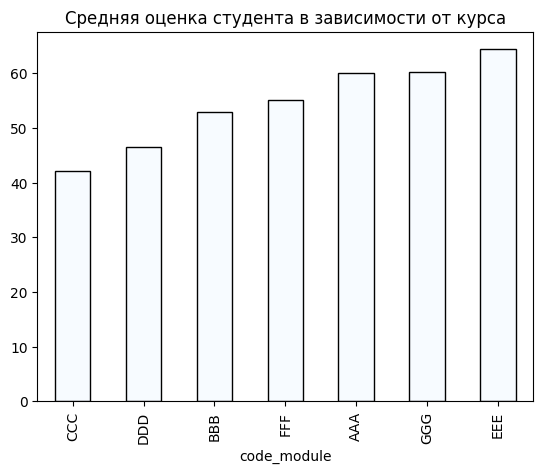

In [ ]:
plt.title('Средняя оценка студента в зависимости от курса')
cm.plot.bar(cmap="Blues", edgecolor='black')

Видно, что самые лучшие оценки у студентов курса EEE, самые худшие у студентов курса CCC

### 2.2. code_presentation - идентификационный код презентации, во время которой студент регистрируется на модуле

<Axes: title={'center': 'Средняя оценка студента в зависимости от презентации'}, xlabel='code_presentation'>

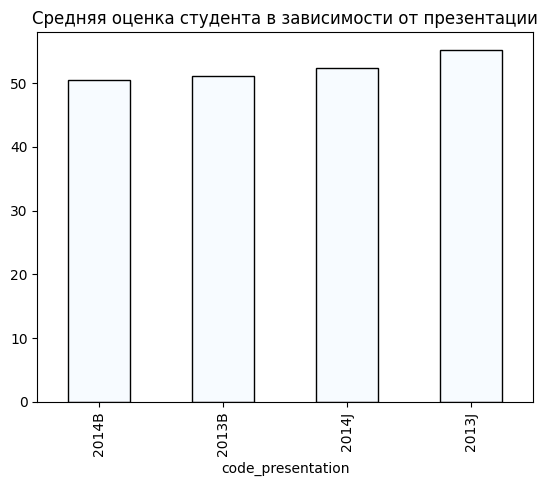

In [ ]:
cp = df.groupby(df["code_presentation"])["weighted_score"].mean().sort_values()
plt.title('Средняя оценка студента в зависимости от презентации')
cp.plot.bar(cmap="Blues", edgecolor='black')

Видно, что студенты записавшиеся на курс после презентации 2013J получили более высокую оценку, чем после других презентаций. Посмотрим как зависит оценка от курса и презентации

<Axes: title={'center': 'Средняя оценка в зависимости от курса и презентации'}, xlabel='code_presentation', ylabel='code_module'>

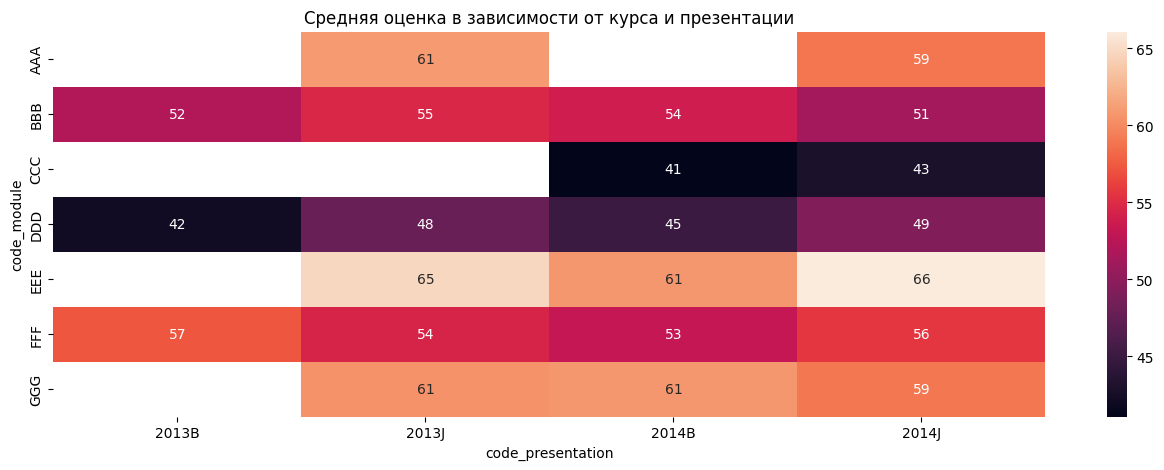

In [ ]:
plt.figure(figsize = (16,5))
plt.title("Средняя оценка в зависимости от курса и презентации")
prt = df.copy()
sns.heatmap(prt.pivot_table(values="weighted_score", index = ['code_module'], columns =["code_presentation"], aggfunc = np.mean), annot = True)

Самые высокие средние оценки у курса EEE и презентации 2014J (66). Самые низкие у курса ССС и презентации 2014В (41).

### 2.3. date_registration - дата регистрации студента на презентацию модуля, это количество дней, измеренное относительно начала презентации модуля (например, отрицательное значение -30 означает, что студент зарегистрировался на презентацию модуля за 30 дней до ее начала).

In [ ]:
def destrib_fig(data, trait, n_bins=50, l_space_start=0, l_space_stop=0.5, l_space_count=10, dens=True):

    target_mean = round(data[trait].mean(), 2)
    target_median = data[trait].median()
    target_mode = data[trait].mode()[0]
    target_quant005 = data[trait].quantile(0.05)
    target_quant995 = data[trait].quantile(0.995)

    plt.figure(figsize = (13, 5))
    plt.hist(data[trait], density=dens, bins=n_bins, alpha=0.9, ec='Black',color = "navy" )

    y = np.linspace(l_space_start, l_space_stop, l_space_count)
    plt.plot([target_mean] * l_space_count, y, label='mean', linestyle='--', linewidth=2)
    plt.plot([target_median] * l_space_count, y, label='median', linestyle='--', linewidth=2)
    plt.plot([target_mode] * l_space_count, y, label='mode', linestyle='--', linewidth=2)
    plt.plot([target_quant005] * l_space_count, y, label='Quantile 0.05', linestyle='--',linewidth=2)
    plt.plot([target_quant995] * l_space_count, y, label='Quantile 0.995', linestyle='--',linewidth=2)
    plt.title(f'Гистограмма для переменной {trait}')
    plt.legend()
    plt.show()

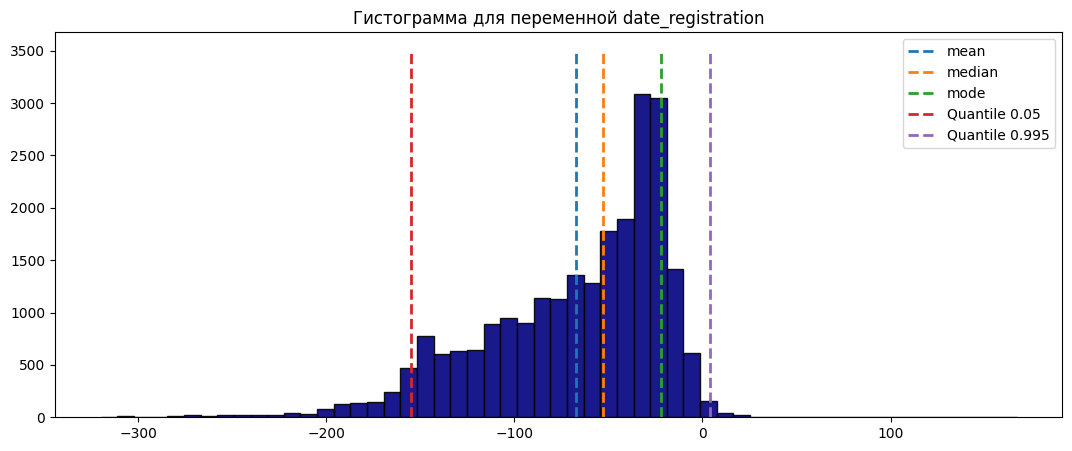

In [ ]:
destrib_fig(df, 'date_registration', dens=False, n_bins=55, l_space_stop=3500)

Анализ гистограммы показал, что больше всего студентов записываются ближе к началу курса. Практически отсутсвуют те, которые записались на курс после его начала. Посмотрим, как зависит успеваемость студентов в зависимости от того, как рано они поступили на курс.

<Axes: xlabel='date_registration', ylabel='weighted_score'>

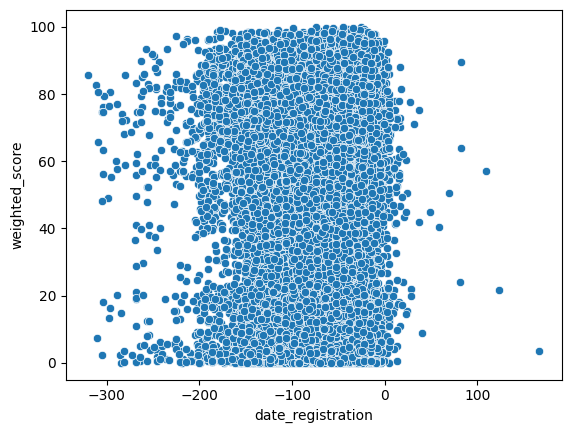

In [ ]:
sns.scatterplot(df, x = "date_registration", y = "weighted_score")

Какая-либо зависимость отсутсвует. Студенты могут получить как 0 баллов, так и ближе к 100 в не зависимости от того когда они записались на курс. Посмотрим то-же только в разрезе курсов.

<Figure size 1000x700 with 0 Axes>

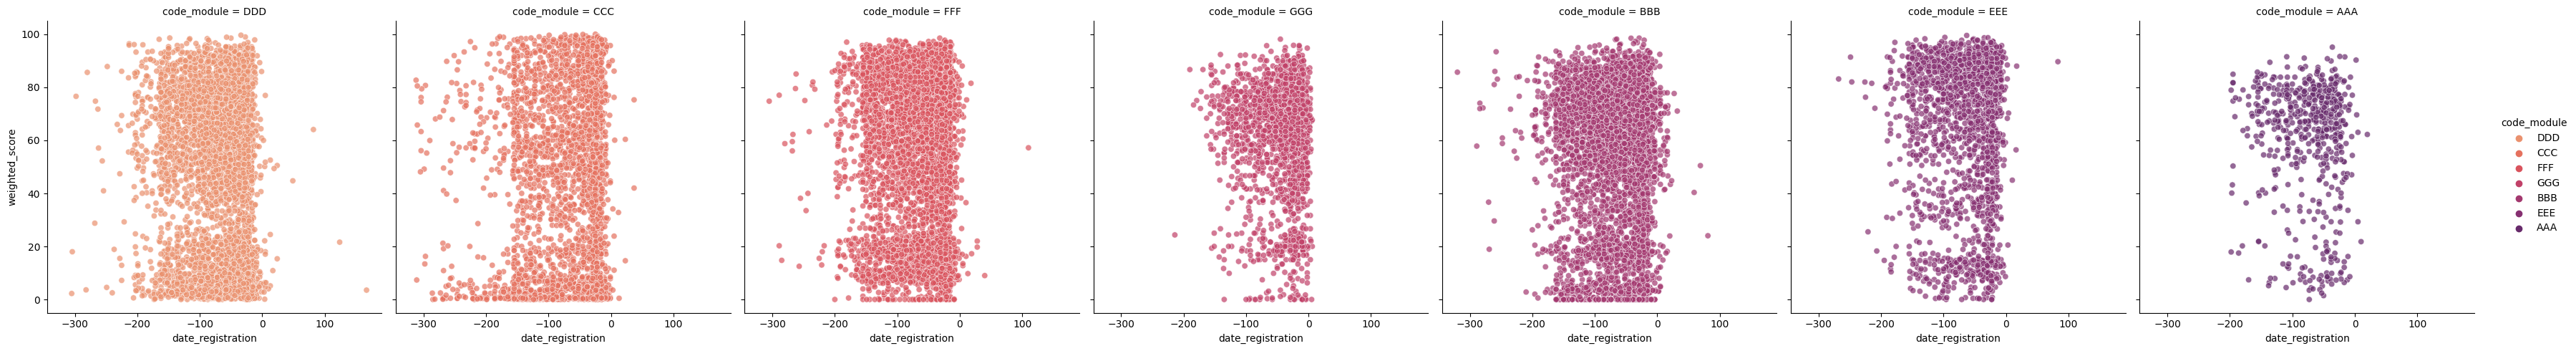

In [ ]:
plt.figure(figsize=(10,7))
sns.relplot(data=df, x = "date_registration", y = "weighted_score", alpha=0.7, hue="code_module" , palette="flare", col="code_module")

Опять никакой зависимости не видно. Посмотрим на матрицу корреляции.

<ipython-input-74-fd2311dd0ac6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", cbar=False);


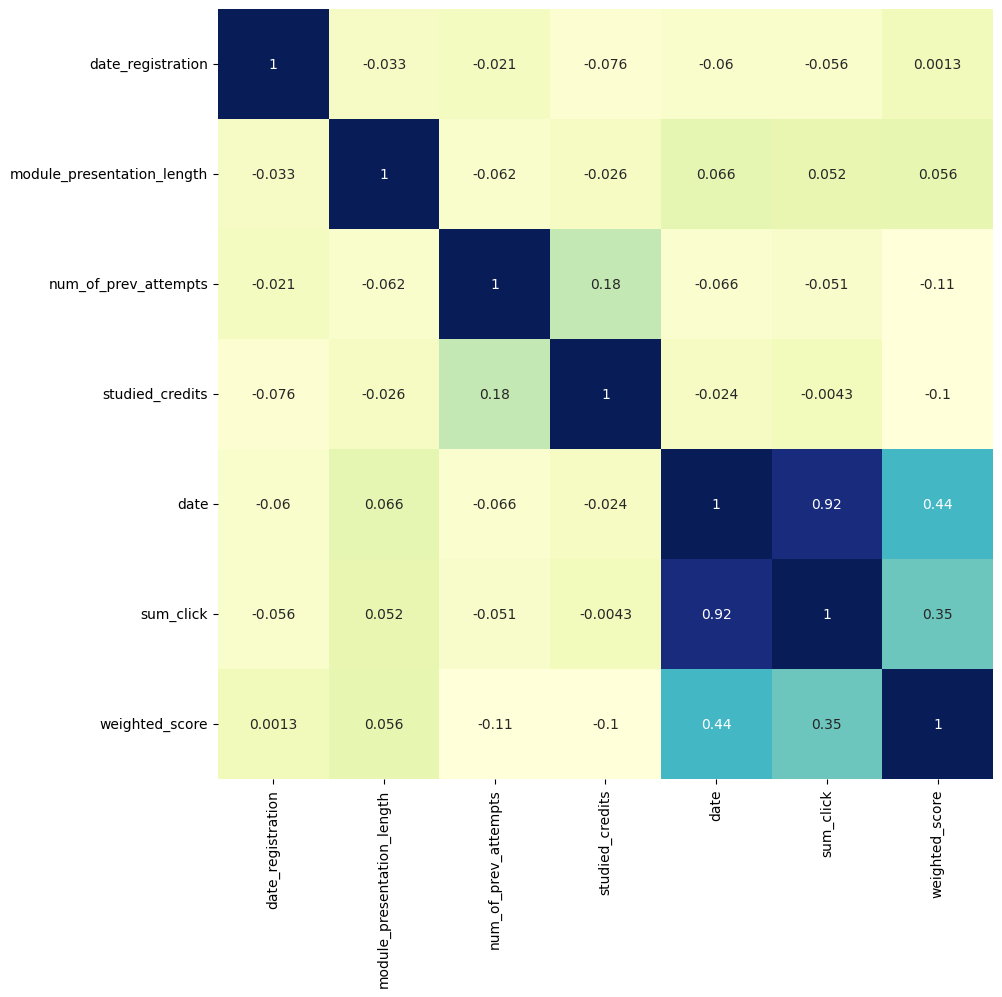

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", cbar=False);

Анализ матрицы корреляции показал, что по дате регистрации отсутсвует какая-либо связь с оценками, которые получил студент.

### 2.4. module_presentation_length - - длина модуля-презентации в днях.

<Axes: title={'center': 'Средняя оценка в зависимости от длины модуля-презентации в днях'}, xlabel='module_presentation_length'>

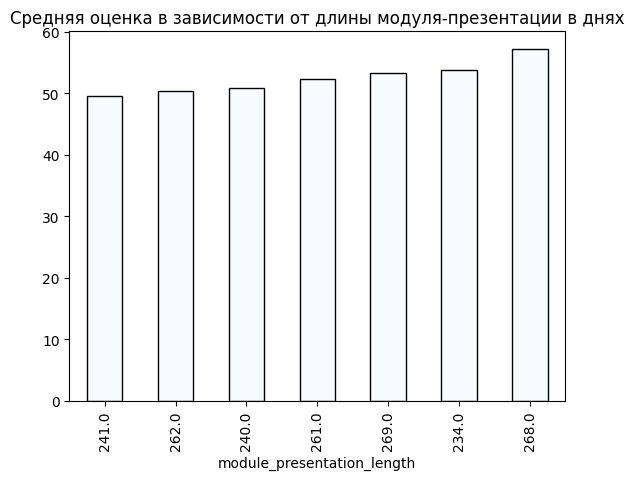

In [ ]:
mpl = df.groupby(df['module_presentation_length'])['weighted_score'].mean().sort_values()
plt.title('Средняя оценка в зависимости от длины модуля-презентации в днях')
mpl.plot.bar(cmap="Blues", edgecolor='black')

Здесь тоже отсутсвует какая-либо линейная связью Нельзя сказать, что чем длинее/короче модуль презентации, тем больше/меньше средний балл

### 2.5. gender – пол ученика

<Axes: title={'center': 'Средняя оценка в зависимости пола ученика'}, xlabel='gender'>

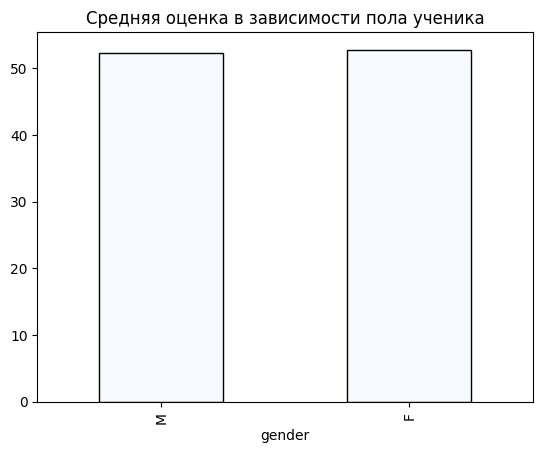

In [ ]:
gen = df.groupby(df['gender'])['weighted_score'].mean().sort_values()
plt.title('Средняя оценка в зависимости пола ученика')
gen.plot.bar(cmap="Blues", edgecolor='black')

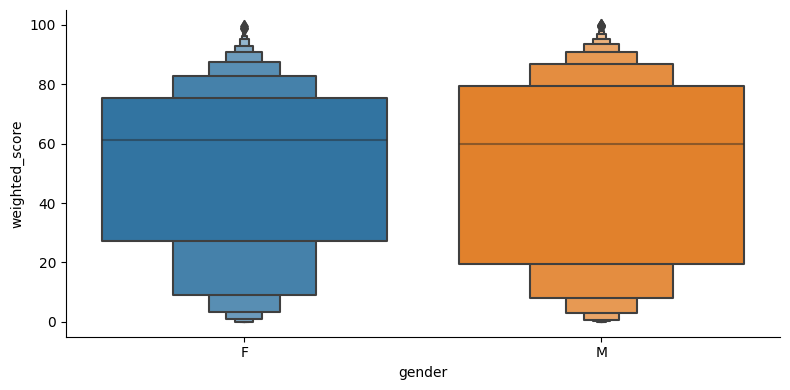

In [ ]:
sns.catplot(x="gender", y="weighted_score", data = df, height=4, aspect=2, kind='boxen')

Удивительно, но по среднему значению не наблюдается какой-либо зависимости. А если посмотреть по минимальному и максимальному баллу:

<Axes: title={'center': 'Максимальный балл в зависимости пола ученика'}, xlabel='gender'>

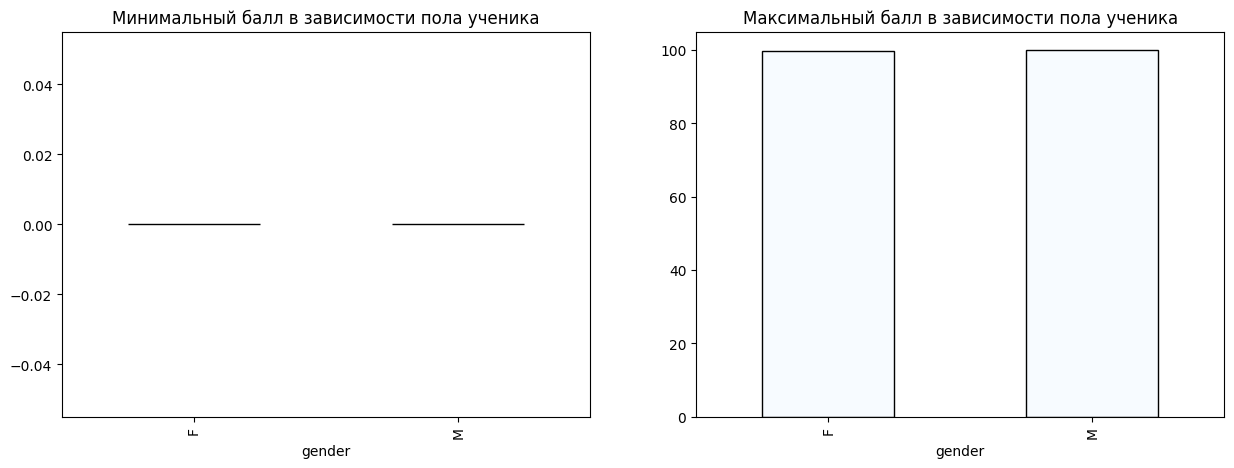

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.subplot(121)
gen_min = df.groupby(df['gender'])['weighted_score'].min().sort_values()
plt.title('Минимальный балл в зависимости пола ученика')
gen_min.plot.bar(cmap="Blues", edgecolor='black')

plt.subplot(122)
gen_max = df.groupby(df['gender'])['weighted_score'].max().sort_values()
plt.title('Максимальный балл в зависимости пола ученика')
gen_max.plot.bar(cmap="Blues", edgecolor='black')

Логично, что и средни мужчин и среди женщин есть те, кто набрал 0 и 100 баллов

### 2.6. region - географический регион, в котором студент проживал во время прохождения модуля-презентации

<Axes: title={'center': 'Средняя оценка в зависимости от региона проживания студента'}, xlabel='region'>

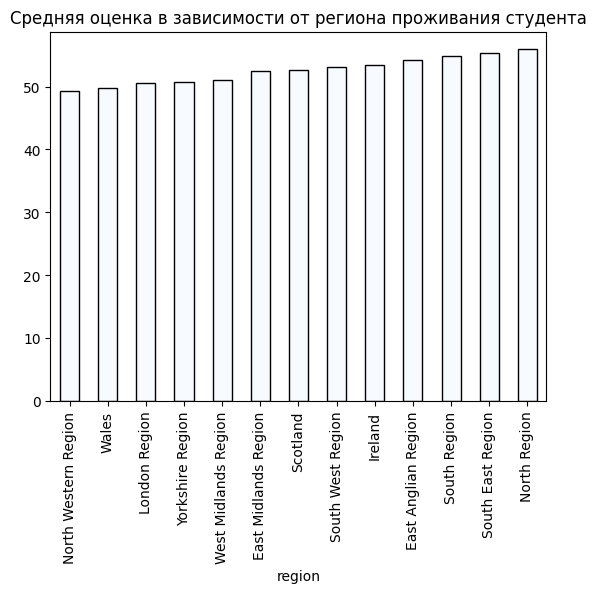

In [ ]:
reg = df.groupby(df['region'])['weighted_score'].mean().sort_values()
plt.title('Средняя оценка в зависимости от региона проживания студента')
reg.plot.bar(cmap="Blues", edgecolor='black')

Самые высокие оценки набрали студенты проживающие в North Region, меньше всего - в North Western Region

### 2.7. highest_education – самый высокий уровень образования студента при поступлении на модульную презентацию.

In [ ]:
df.groupby(df['highest_education'])['weighted_score'].mean().sort_values()

highest_education
No Formal quals                42.850183
Lower Than A Level             48.621303
A Level or Equivalent          54.528331
HE Qualification               56.851580
Post Graduate Qualification    63.368477
Name: weighted_score, dtype: float64

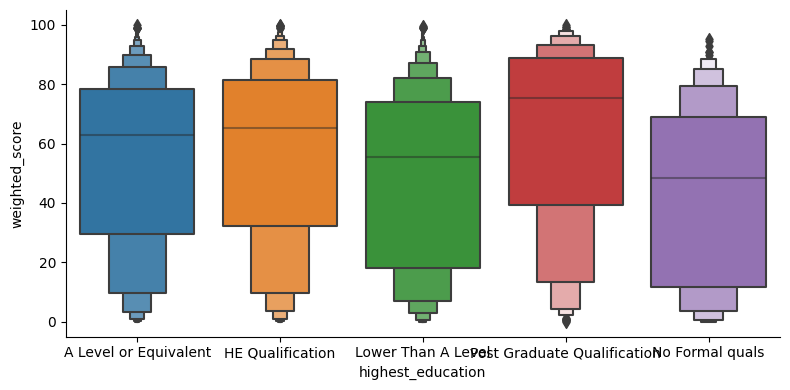

In [ ]:
sns.catplot(x="highest_education", y="weighted_score", data = df, height=4, aspect=2, kind='boxen')

Если у студента имелось образование с дипломом (Post Graduate Qualification), то (ожидаемо) и средняя оценка выше, самые низкие оценки у студентов, у которых нет никакого образования (No Formal quals)

### 2.8. imd_band	- насколько бедный район

<Axes: title={'center': 'Средняя оценка от уровня района проживания студента'}, xlabel='imd_band'>

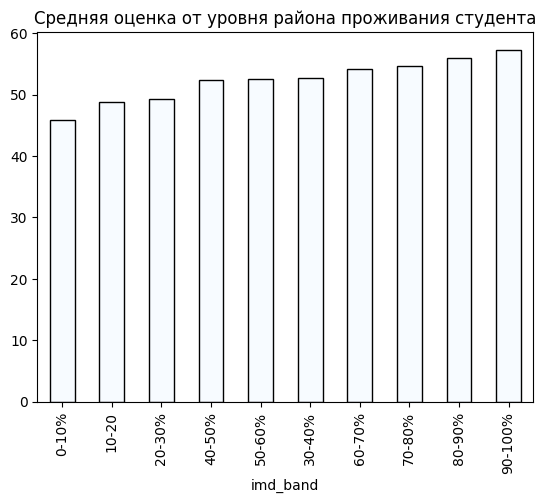

In [ ]:
im_d = df.groupby(df['imd_band'])['weighted_score'].mean().sort_values()
plt.title('Средняя оценка от уровня района проживания студента')
im_d.plot.bar(cmap="Blues", edgecolor='black')

Логично, что самые высокие оценки получили студенты, проживающие в благополучных районах, чем, бедняки. 

### 2.9. age_band	- диапазон студенческого возраста

In [ ]:
df.groupby(df['age_band'])['weighted_score'].mean().sort_values()

age_band
0-35     51.495135
35-55    54.758222
55<=     58.716636
Name: weighted_score, dtype: float64

In [ ]:
df.groupby(df['age_band'])['weighted_score'].max().sort_values()

age_band
55<=      98.64
0-35      99.90
35-55    100.00
Name: weighted_score, dtype: float64

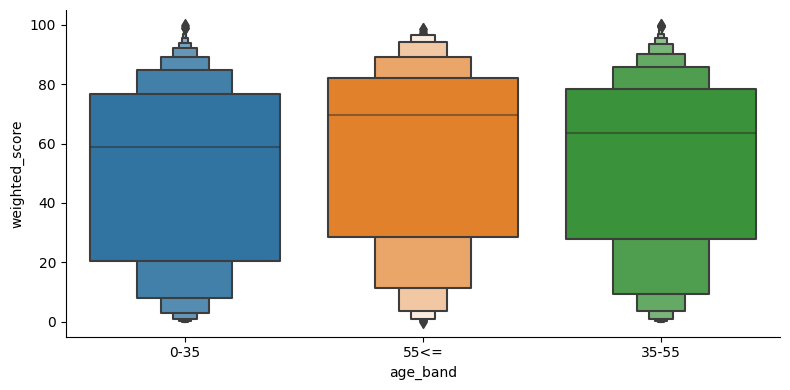

In [ ]:
sns.catplot(x="age_band", y="weighted_score", data = df, height=4, aspect=2, kind='boxen')

В среднем чем старше человек, тем средняя оценка выше, однако, среди более страшего поколения ( более 54 лет) нет ни одного, кото-бы набрал максимальный балл (100)

### 2.10. num_of_prev_attempts – количество раз, когда учащийся пытался пройти этот модуль.

In [ ]:
df.groupby(['num_of_prev_attempts'])['weighted_score'].mean()

num_of_prev_attempts
0.0    53.744320
1.0    44.713468
2.0    41.394601
3.0    39.171931
4.0    40.292232
5.0    38.807870
6.0    45.057500
Name: weighted_score, dtype: float64

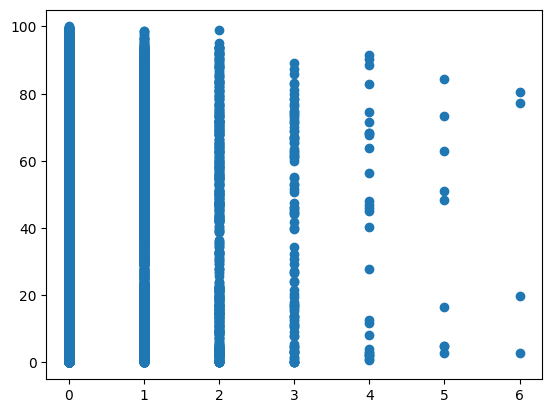

In [ ]:
plt.scatter(x = df['num_of_prev_attempts'], y = df['weighted_score'])

Очень много студентов проходили модули 1 раз. Меньше всего студентов которые пытались пройти модуль 5 и 6 раз. В среднем, у тех кто сразу прошел модуль оценка выше, чем у тех, кто пытался пройти модуль несколько раз.

### 2.11.studied_credits – общее количество кредитов по модулям, которые студент изучает в настоящее время.

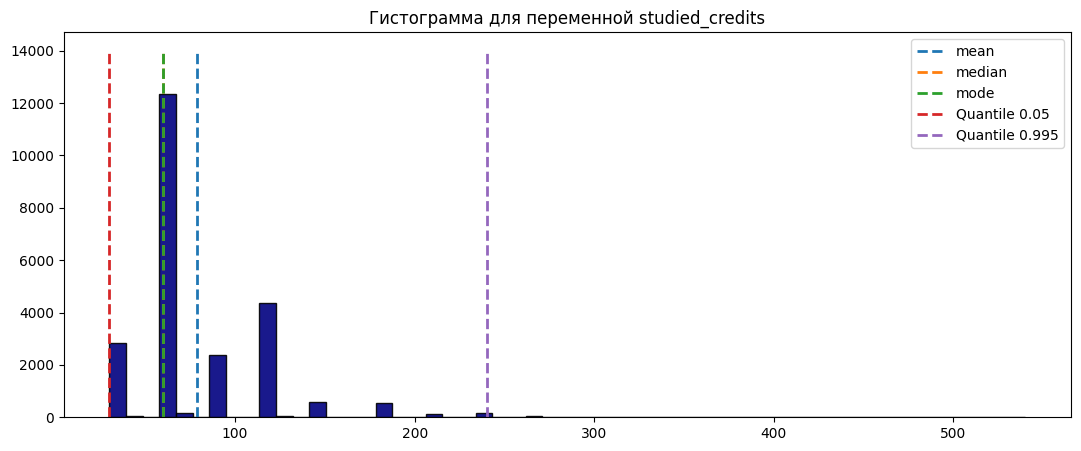

In [ ]:
destrib_fig(df, 'studied_credits', dens=False, n_bins=55, l_space_stop=14000)

<Axes: xlabel='studied_credits', ylabel='weighted_score'>

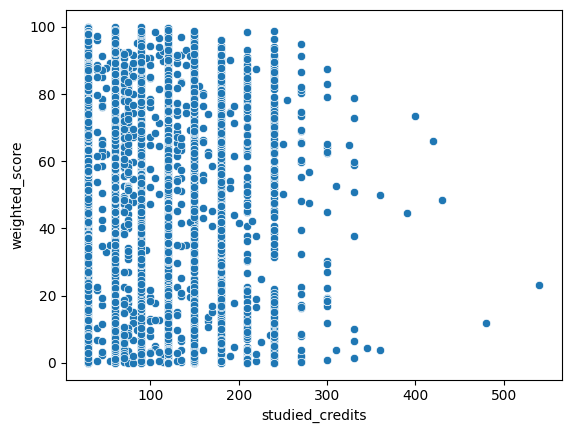

In [ ]:
sns.scatterplot(df, x = "studied_credits", y = "weighted_score")

У большинстава студентов кредитов не много, с ростом кредитов ухудшается оценка

### 2.12. disability – указывает, признан ли студент инвалидом.

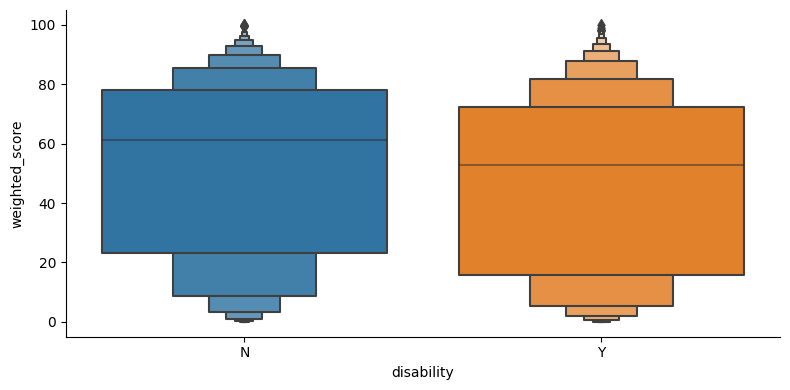

In [ ]:
sns.catplot(x="disability", y="weighted_score", data = df, height=4, aspect=2, kind='boxen')

Инвалиды учатся хуже, чем не инвалиды.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26074 entries, 0 to 26073
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 26074 non-null  object 
 1   code_presentation           26074 non-null  object 
 2   date_registration           23774 non-null  float64
 3   module_presentation_length  23783 non-null  float64
 4   gender                      23783 non-null  object 
 5   region                      23783 non-null  object 
 6   highest_education           23783 non-null  object 
 7   imd_band                    22932 non-null  object 
 8   age_band                    23783 non-null  object 
 9   num_of_prev_attempts        23783 non-null  float64
 10  studied_credits             23783 non-null  float64
 11  disability                  23783 non-null  object 
 12  date                        23783 non-null  float64
 13  sum_click                   237

### 13. date - дата взаимодействия студента с материалом измеряется как количество дней с начала модуля-презентации.

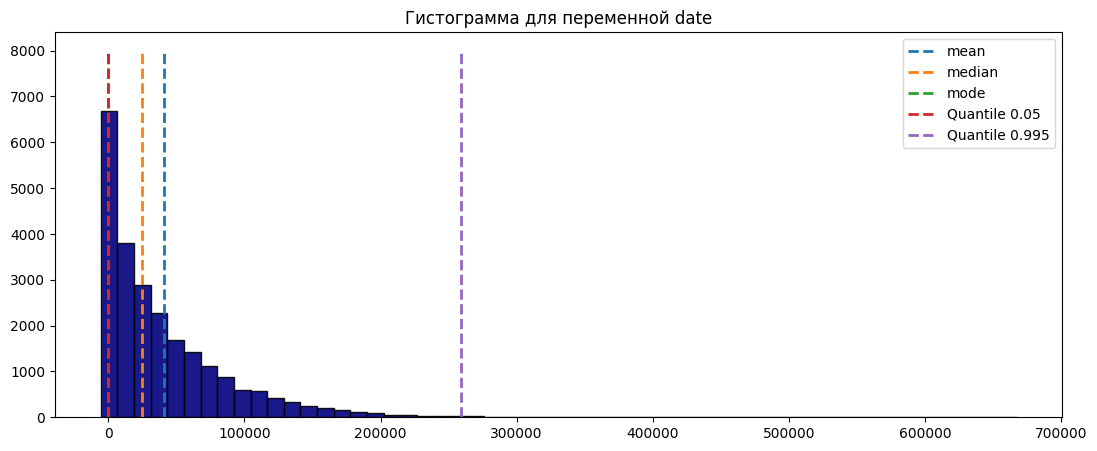

In [ ]:
destrib_fig(df, 'date', dens=False, n_bins=55, l_space_stop=8000)

<Axes: xlabel='date', ylabel='weighted_score'>

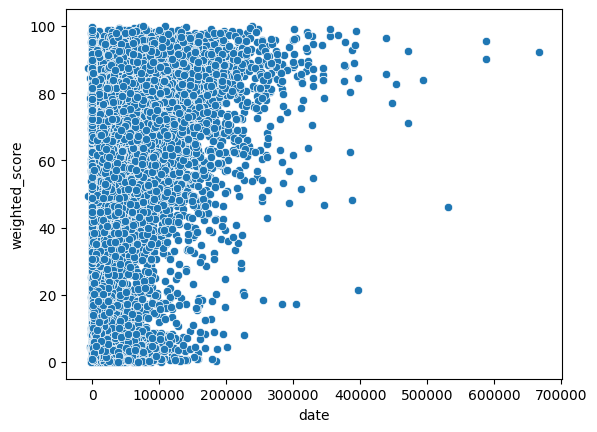

In [ ]:
sns.scatterplot(df, x = "date", y = "weighted_score")

Опять не наблюдаем какой-либо зависимости.

### 14. sum_click - сколько раз учащийся взаимодействовал с материалом в этот день.

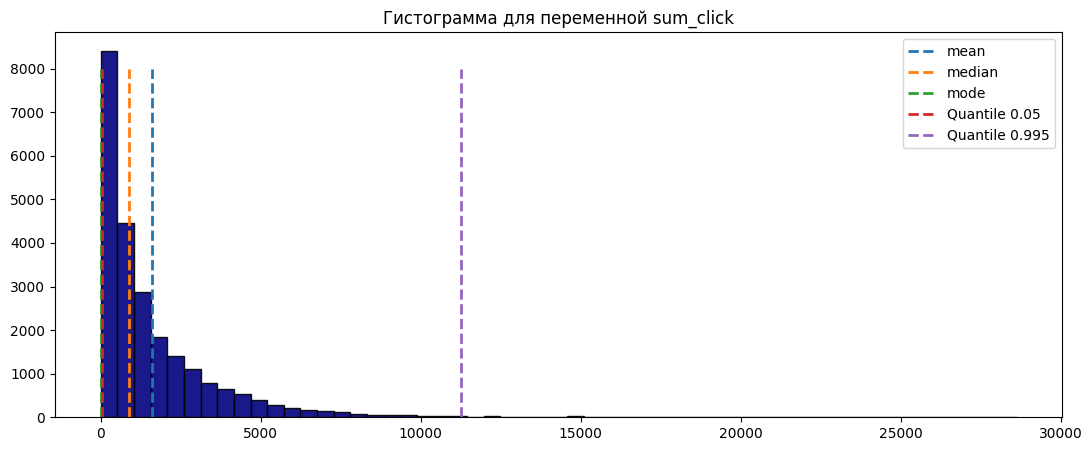

In [ ]:
destrib_fig(df, 'sum_click', dens=False, n_bins=55, l_space_stop=8000)

<Axes: xlabel='sum_click', ylabel='weighted_score'>

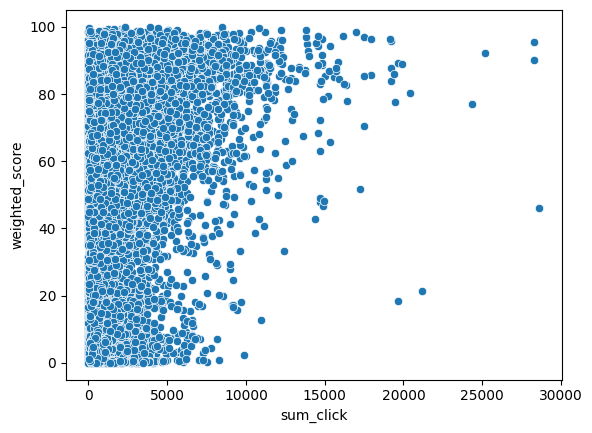

In [ ]:
sns.scatterplot(df, x = "sum_click", y = "weighted_score")

Можно предположить, что чем чаще студен учился, тем его средняя оценка была лучше

## Обучение модели

У нас есть обучающие данные  - без целевой метрики и сами метрики:

In [ ]:
Train.head(2)

,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,sum_click
ID,,,,,,,,,,,,,,
0,DDD,2014B,-36.0,241.0,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,1.0,70.0,N,65566.0,1694.0
1,DDD,2013J,-32.0,261.0,M,Scotland,A Level or Equivalent,20-30%,0-35,0.0,120.0,N,9671.0,692.0


In [ ]:
Test.head(2)

,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,sum_click
ID,,,,,,,,,,,,,,
26074,DDD,2014J,-92.0,262.0,M,Scotland,Lower Than A Level,50-60%,0-35,2.0,60.0,N,8090.0,414.0
26075,CCC,2014B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Target.head(2)

,weighted_score
ID,
0,64.9125
1,14.8625


In [ ]:
Submission.head(2)

,weighted_score
ID,
26074,52.319915
26075,52.319915


Преобразуем данные с помощью Pipeline

In [ ]:
from sklearn.impute import SimpleImputer # Объект для замены пропущенных значений
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # Импортируем нормализацию и One-Hot Encoding от scki-kit-learn
from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить
from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

In [ ]:
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

In [ ]:
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', )),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

In [ ]:
preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_columns),
    ('cat', categorical_pipe, cat_columns)
])

In [ ]:
preprocessors.fit(Train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['date_registration',
                                  'module_presentation_length',
                                  'num_of_prev_attempts', 'studied_credits',
                                  'date', 'sum_click']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['code_module', 'code_presentation', 'gender',
                                  'region', 'highest_education', 'imd_band',
                                  'age_band', 'disability'])])

In [ ]:
X_train = preprocessors.transform(Train) # преобразуем  тренировочные данные
X_test = preprocessors.transform(Test) # преобразуем  тестовые данные

In [ ]:
X_train.shape

(26074, 50)

In [ ]:
X_test.shape

(6519, 50)

### Регрессия Методом к-Ближайших Соседей

In [ ]:
from sklearn.neighbors import KNeighborsRegressor # Регрессия К-Ближайших соседей от scikit-learn
from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn

In [ ]:
kNN = KNeighborsRegressor(n_neighbors=9, weights='distance' )

In [ ]:
kNN.fit(X_train, Target)

KNeighborsRegressor(n_neighbors=9, weights='distance')

In [ ]:
predict = kNN.predict(X_test)

In [ ]:
Submission['weighted_score'] = predict

In [ ]:
Submission

,weighted_score
ID,
26074,42.741512
26075,38.740556
26076,40.391667
26077,47.804018
26078,65.556667
...,...
32588,37.164568
32589,43.030271
32590,61.951708


In [ ]:
Submission.to_csv('/content/RIDGE_Submission.csv',index=True)

In [ ]:
#                                ↓ соревнование         ↓ название файла     ↓ комментарий 
!kaggle competitions submit -c urfuaieng2022reg2 -f RIDGE_Submission.csv -m "ridge regression test" 

100% 154k/154k [00:00<00:00, 163kB/s]
Successfully submitted to UrFU_AI_Eng_2022_Reg_2

Что-то совсем все плохо. Вернемся к линейной модели

## Банальная Ridge регрессия

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge(alpha=0.001, random_state=42)
model.fit(X_train, Target)

Ridge(alpha=0.001, random_state=42)

### Поиск с помощью поиска по сетке

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные

In [ ]:
alpha_range = 10**np.linspace(-4, 4,15) 

tuned_parameters = [{'alpha':  alpha_range }]

Ridge_search_ = GridSearchCV(estimator = Ridge(max_iter=10000 ), verbose = 3,
                          param_grid=tuned_parameters ,
                          cv=ShuffleSplit(n_splits=5, random_state=42))

In [ ]:
Ridge_search_.fit(X_train, Target)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ......................alpha=0.0001;, score=0.294 total time=   0.1s
[CV 2/5] END ......................alpha=0.0001;, score=0.276 total time=   0.1s
[CV 3/5] END ......................alpha=0.0001;, score=0.289 total time=   0.1s
[CV 4/5] END ......................alpha=0.0001;, score=0.275 total time=   0.1s
[CV 5/5] END ......................alpha=0.0001;, score=0.274 total time=   0.1s
[CV 1/5] END .......alpha=0.0003727593720314938;, score=0.294 total time=   0.1s
[CV 2/5] END .......alpha=0.0003727593720314938;, score=0.276 total time=   0.1s
[CV 3/5] END .......alpha=0.0003727593720314938;, score=0.289 total time=   0.1s
[CV 4/5] END .......alpha=0.0003727593720314938;, score=0.275 total time=   0.0s
[CV 5/5] END .......alpha=0.0003727593720314938;, score=0.274 total time=   0.0s
[CV 1/5] END .......alpha=0.0013894954943731374;, score=0.294 total time=   0.0s
[CV 2/5] END .......alpha=0.0013894954943731374;

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=None, train_size=None),
             estimator=Ridge(max_iter=10000),
             param_grid=[{'alpha': array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04])}],
             verbose=3)

In [ ]:
Ridge_search_.best_estimator_

Ridge(alpha=0.0001, max_iter=10000)

In [ ]:
model_l = Ridge(alpha=0.0001, random_state=42, max_iter=10000)
model_l.fit(X_train, Target)

Ridge(alpha=0.0001, max_iter=10000, random_state=42)

In [ ]:
predict = model_l.predict(X_test)

In [ ]:
Submission['weighted_score'] = predict

In [ ]:
Submission

,weighted_score
ID,
26074,26.826245
26075,35.816521
26076,55.191513
26077,27.319012
26078,55.162204
...,...
32588,27.584963
32589,34.024865
32590,64.569168


In [ ]:
Submission.to_csv('/content/RIDGE_Submission.csv',index=True)

In [ ]:
#                                ↓ соревнование         ↓ название файла     ↓ комментарий 
!kaggle competitions submit -c urfuaieng2022reg2 -f RIDGE_Submission.csv -m "ridge regression test" 

100% 154k/154k [00:01<00:00, 115kB/s]
Successfully submitted to UrFU_AI_Eng_2022_Reg_2

###Поиск Лучших Гиперпараметров с Помощью Рандомизированного Поиска

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

In [ ]:
alpha_range = loguniform(1e-4, 1e4) 

tuned_parameters = [{'alpha':  alpha_range }]

n_iter_search = 25

Ridge_search = RandomizedSearchCV(estimator = Ridge(max_iter=10000 ), verbose = 3,
                          param_distributions=tuned_parameters ,
                          cv=ShuffleSplit(n_splits=5, random_state=42),n_iter = n_iter_search)

In [ ]:
Ridge_search.fit(X_train, Target)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .........alpha=0.41067046380483374;, score=0.294 total time=   0.0s
[CV 2/5] END .........alpha=0.41067046380483374;, score=0.276 total time=   0.0s
[CV 3/5] END .........alpha=0.41067046380483374;, score=0.289 total time=   0.0s
[CV 4/5] END .........alpha=0.41067046380483374;, score=0.275 total time=   0.0s
[CV 5/5] END .........alpha=0.41067046380483374;, score=0.273 total time=   0.0s
[CV 1/5] END ...........alpha=365.2318002885052;, score=0.175 total time=   0.0s
[CV 2/5] END ...........alpha=365.2318002885052;, score=0.163 total time=   0.0s
[CV 3/5] END ...........alpha=365.2318002885052;, score=0.179 total time=   0.0s
[CV 4/5] END ...........alpha=365.2318002885052;, score=0.169 total time=   0.0s
[CV 5/5] END ...........alpha=365.2318002885052;, score=0.169 total time=   0.0s
[CV 1/5] END ............alpha=1.12850130951957;, score=0.294 total time=   0.0s
[CV 2/5] END ............alpha=1.12850130951957

RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=None, train_size=None),
                   estimator=Ridge(max_iter=10000), n_iter=25,
                   param_distributions=[{'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fec7d9bb1c0>}],
                   verbose=3)

In [ ]:
Ridge_search.best_estimator_

Ridge(alpha=0.00015419151603824932, max_iter=10000)

In [ ]:
model_l2 = Ridge(alpha=0.000154, random_state=42, max_iter=10000)
model_l2.fit(X_train, Target)

Ridge(alpha=0.000154, max_iter=10000, random_state=42)

In [ ]:
predict = model_l2.predict(X_test)

In [ ]:
Submission['weighted_score'] = predict

In [ ]:
Submission.to_csv('/content/My_Submission.csv',index=True)

In [ ]:
#                                ↓ соревнование         ↓ название файла     ↓ комментарий 
!kaggle competitions submit -c urfuaieng2022reg2 -f My_Submission.csv -m "ridge regression test" 

100% 154k/154k [00:00<00:00, 180kB/s]
Successfully submitted to UrFU_AI_Eng_2022_Reg_2

Мой лучший результат - 644.36802 (для меня это уже победа!). Участник  - KozhedubNC